# Sustainable Happiness - DS Coursework python code :Student ID 210011371

Library files imported

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Datasets used from world happiness report

In [2]:
a = pd.read_csv('2015.csv')
b = pd.read_csv('2016.csv')
c = pd.read_csv('2017.csv')
d = pd.read_csv('2018.csv')
e = pd.read_csv('2019.csv')
f = pd.read_csv('2020.csv')

The following columns need to be renamed as for each dataset - a(for year 2015) ,b(for year 2016)  ,c(for year 2017)  ,d (for year 2018) ,e(for year 2019)  ,f(for year 2020)  :

a = Happiness Score,Standard Error,Economy (GDP per Capita),Generosity,Trust (Government Corruption),Dystopia Residual

b = Happiness Score,Economy (GDP per Capita),Generosity,Trust (Government Corruption),Lower Confidence Interval,Upper Confidence Interval,Dystopia Residual

c = Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Generosity,Trust..Government.Corruption.,Whisker.high,Whisker.low,Dystopia.Residual

d = Country or region,Overall rank,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Social support

e = Country or region,Overall rank,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Social support

f = Country name,Regional indicator,Explained by: Log GDP per capita,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Perceptions of corruption

In [3]:
#---------------------------Data Engineering--------------------------------------------

#Before merging added year as a column to differentiate the data under each dataset
a['Year'] = '2015'
b['Year'] = '2016'
c['Year'] = '2017'
d['Year'] = '2018'
e['Year'] = '2019'
f['Year'] = '2020'

#Rename the column name to match with all the dataset corresponding to the given column
a.rename(columns={'Happiness Score':'Ladder score',\
                  'Standard Error':'Standard error of ladder score',\
                  'Economy (GDP per Capita)':'Log GDP per capita',\
                  'Generosity':'Explained by: Generosity',\
                  'Trust (Government Corruption)':'Government Corruption',\
                  'Dystopia Residual':'Dystopia + residual'}\
         ,inplace= True)
           
b.rename(columns={'Happiness Score':'Ladder score',\
                  'Economy (GDP per Capita)':'Log GDP per capita',\
                  'Generosity':'Explained by: Generosity',\
                  'Trust (Government Corruption)':'Government Corruption',\
                  'Lower Confidence Interval':'lowerwhisker',\
                  'Upper Confidence Interval':'upperwhisker',\
                  'Dystopia Residual':'Dystopia + residual'}\
         ,inplace= True)
c.rename(columns={'Happiness.Rank':'Happiness Rank',\
                  'Happiness.Score':'Ladder score',\
                  'Economy..GDP.per.Capita.':'Log GDP per capita',\
                  'Health..Life.Expectancy.':'Health (Life Expectancy)',\
                  'Trust..Government.Corruption.':'Government Corruption',\
                  'Generosity':'Explained by: Generosity',\
                  'Whisker.high':'upperwhisker',\
                  'Whisker.low':'lowerwhisker',\
                  'Dystopia.Residual':'Dystopia + residual'}\
         ,inplace= True)
d.rename(columns={'Country or region':'Country',\
                  'Overall rank':'Happiness Rank',\
                  'Score':'Ladder score',\
                  'GDP per capita':'Log GDP per capita',\
                  'Healthy life expectancy':'Health (Life Expectancy)',\
                  'Freedom to make life choices':'Freedom',\
                  'Perceptions of corruption':'Government Corruption',\
                  'Generosity':'Explained by: Generosity',\
                  'Social support':'Explained by: Social support'}\
         ,inplace= True)
e.rename(columns={'Country or region':'Country',\
                  'Overall rank':'Happiness Rank',\
                  'Score':'Ladder score',\
                  'GDP per capita':'Log GDP per capita',\
                  'Healthy life expectancy':'Health (Life Expectancy)',\
                  'Freedom to make life choices':'Freedom',\
                  'Perceptions of corruption':'Government Corruption',\
                  'Generosity':'Explained by: Generosity',\
                  'Social support':'Explained by: Social support'}\
         ,inplace= True)
f.rename(columns={'Country name':'Country',\
                  'Regional indicator':'Region',\
 
                  'Explained by: Log GDP per capita':'Log GDP per capita',\
                  'Explained by: Healthy life expectancy':'Health (Life Expectancy)',\
                  'Explained by: Freedom to make life choices':'Freedom',\
                  'Explained by: Perceptions of corruption':'Government Corruption'}\
         ,inplace= True)  

For merging all the datasets together first the missing columns in each dataframes are added to each dataset and assigned zero.Missing columns are added according to the renamed column names.

In [4]:
#Adding the missing header in each datafame and assigning zero as there is no data available for the same    
List_col_a = ['Explained by: Social support','upperwhisker','lowerwhisker','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Ladder score in Dystopia']
for i in List_col_a:
    a[i]= None
print("printing a",a.shape[0] - a.count())

List_col_b = ['Standard error of ladder score','Explained by: Social support','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Ladder score in Dystopia']
for i in List_col_b:
    b[i]= None
print("printing b",b.shape[0] - b.count())

List_col_c = ['Region','Standard error of ladder score','Explained by: Social support','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Ladder score in Dystopia']
for i in List_col_c:
    c[i]= None
print("printing c",c.shape[0] - c.count())

List_col_d = ['Region','Standard error of ladder score','Family','Dystopia + residual','upperwhisker','lowerwhisker','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Ladder score in Dystopia']
for i in List_col_d:
    d[i]= None
print("printing d",d.shape[0] - d.count())

List_col_e = ['Region','Family','Standard error of ladder score','Dystopia + residual','upperwhisker','lowerwhisker','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Ladder score in Dystopia']
for i in List_col_e:
    e[i]= None
print("printing e",e.shape[0] - e.count()) 

List_col_f = ['Happiness Rank','Family']
for i in List_col_f:
    f[i]= None
print("printing f",f.shape[0] - f.count())

printing a Country                             0
Region                              0
Happiness Rank                      0
Ladder score                        0
Standard error of ladder score      0
Log GDP per capita                  0
Family                              0
Health (Life Expectancy)            0
Freedom                             0
Government Corruption               0
Explained by: Generosity            0
Dystopia + residual                 0
Year                                0
Explained by: Social support      158
upperwhisker                      158
lowerwhisker                      158
Logged GDP per capita             158
Social support                    158
Healthy life expectancy           158
Freedom to make life choices      158
Generosity                        158
Perceptions of corruption         158
Ladder score in Dystopia          158
dtype: int64
printing b Country                             0
Region                              0
Happiness Rank 

In [5]:
# Checking if all columns are added correctly to avoid index error while concatination
print('printing all columns for happiness report of 2015.......')
for col in a.columns:
    print(col)
    
print('printing all columns for happiness report of 2016.......')
for col in b.columns:
    print(col)
    
print('printing all columns for happiness report of 2017.......')
for col in c.columns:
    print(col)
    
print('printing all columns for happiness report of 2018.......')
for col in d.columns:
    print(col)

print('printing all columns for happiness report of 2019.......')
for col in e.columns:
    print(col)
    
print('printing all columns for happiness report of 2020.......')
for col in f.columns:
    print(col)  
 

printing all columns for happiness report of 2015.......
Country
Region
Happiness Rank
Ladder score
Standard error of ladder score
Log GDP per capita
Family
Health (Life Expectancy)
Freedom
Government Corruption
Explained by: Generosity
Dystopia + residual
Year
Explained by: Social support
upperwhisker
lowerwhisker
Logged GDP per capita
Social support
Healthy life expectancy
Freedom to make life choices
Generosity
Perceptions of corruption
Ladder score in Dystopia
printing all columns for happiness report of 2016.......
Country
Region
Happiness Rank
Ladder score
lowerwhisker
upperwhisker
Log GDP per capita
Family
Health (Life Expectancy)
Freedom
Government Corruption
Explained by: Generosity
Dystopia + residual
Year
Standard error of ladder score
Explained by: Social support
Logged GDP per capita
Social support
Healthy life expectancy
Freedom to make life choices
Generosity
Perceptions of corruption
Ladder score in Dystopia
printing all columns for happiness report of 2017.......
Count

Merging datasets ,Data Cleaning and Feature Engineering Stage

Index(['Region', 'Happiness Rank', 'Standard error of ladder score', 'Family',
       'Government Corruption', 'Dystopia + residual',
       'Explained by: Social support', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia'],
      dtype='object')
Country                             0
Region                            467
Happiness Rank                    153
Ladder score                        0
Standard error of ladder score    624
Log GDP per capita                  0
Family                            465
Health (Life Expectancy)            0
Freedom                             0
Government Corruption               1
Explained by: Generosity            0
Dystopia + residual               312
Year                                0
Explained by: Social support      470
upperwhisker                      470
lowerwhi

<AxesSubplot:title={'center':'Log GDP per capita of happiest countries from 2015- 2020'}, xlabel='Countries', ylabel='Log GDP per capita'>

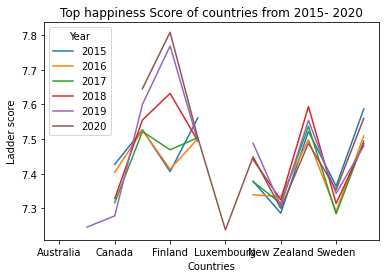

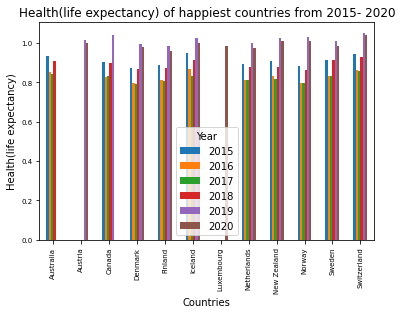

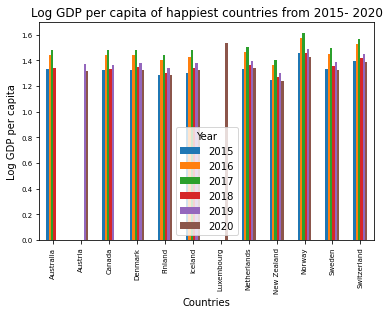

In [6]:
#-------------------Merging datasets ,Data Cleaning and Feature Engineering Stage----------------------------------------------
# Merging years from 2015 - 2020 .As the values for 2021 is not avalable for Happy planet index it is dropped from the study

df1 = pd.concat([a,b,c,d,e,f],axis=0,ignore_index=True)
print(df1.columns[df1.isna().any()])
print(df1.shape[0] - df1.count()) #count of None values displayed

#To get countries with highest ladder score(happiness score), took the top countries for each year from 2015 - 2020
Top_cou_2015 = a.nlargest(10, 'Ladder score')# All rows of top countries with respect to lader score in year 2015
Top_cou_2016 = b.nlargest(10, 'Ladder score')# All rows of top countries with respect to lader score in year 2016
Top_cou_2017 = c.nlargest(10, 'Ladder score')# All rows of top countries with respect to lader score in year 2017
Top_cou_2018 = d.nlargest(10, 'Ladder score')# All rows of top countries with respect to lader score in year 2018
Top_cou_2019 = e.nlargest(10, 'Ladder score')# All rows of top countries with respect to lader score in year 2019
Top_cou_2020 = f.nlargest(10, 'Ladder score')# All rows of top countries with respect to lader score in year 2020
#Concatenated all the top performing countries from 2015 -2016
All_Top_Countries = pd.concat([Top_cou_2015,Top_cou_2016,Top_cou_2017,Top_cou_2018,Top_cou_2019,Top_cou_2020],axis=0,ignore_index=True)

print(All_Top_Countries.Country)

#Top_country_2020 = ['Finland','Denmark','Norway','Iceland','Netherlands','Switzerland','Sweden','New Zealand','Canada','Austria']

#To do initial data analysis : Health(life expectancy),Log GDP per capita and ladder score ,these features are plotted for top countries

#Did a pivot table with years as columns ,countries as index and ladder score as values
pv = pd.pivot_table(All_Top_Countries,index = All_Top_Countries.Country,columns = All_Top_Countries.Year, values ='Ladder score')

#Ploted line graph for all the top countries w.r.t ladder score for each year
pv.plot(kind ='line',title='Top happiness Score of countries from 2015- 2020',xlabel= 'Countries',ylabel='Ladder score')

#Did a pivot table with years as columns ,countries as index and health life expectancy as values
pv1 = pd.pivot_table(All_Top_Countries,index = All_Top_Countries.Country,columns = All_Top_Countries.Year, values ='Health (Life Expectancy)')

#Ploted line graph for all the top countries w.r.t health life expectancy for each year
pv1.plot(kind ='bar',fontsize= 7,title='Health(life expectancy) of happiest countries from 2015- 2020',xlabel= 'Countries',ylabel='Health(life expectancy)',legend = {'reverse'})

#Did a pivot table with years as columns ,countries as index and log GDP per capita as values
pv2 = pd.pivot_table(All_Top_Countries,index = All_Top_Countries.Country,columns = All_Top_Countries.Year, values ='Log GDP per capita')

#Ploted line graph for all the top countries w.r.t log GDP per capita for each year
pv2.plot(kind ='bar',fontsize= 7,title='Log GDP per capita of happiest countries from 2015- 2020',xlabel= 'Countries',ylabel='Log GDP per capita')

     HPI rank              Country  ISO  Continent  Population (thousands)  \
0         1.0          Switzerland  CHE          3                8654.618   
1         2.0          New Zealand  NZL          2                4822.233   
2         3.0           Kyrgyzstan  KGZ          7                6524.191   
3         4.0              Uruguay  URY          1                3473.727   
4         5.0          Netherlands  NLD          3               17134.873   
..        ...                  ...  ...        ...                     ...   
907       NaN  Trinidad and Tobago  TTO          1                1370.332   
908       NaN            Hong Kong  HKG          8                7185.992   
909       NaN              Comoros  COM          5                 777.435   
910       NaN             Eswatini  SWZ          5                1104.038   
911       NaN                Sudan  SDN          5               38902.948   

     Life Expectancy (years)  Ladder of life (Wellbeing) (0-10)

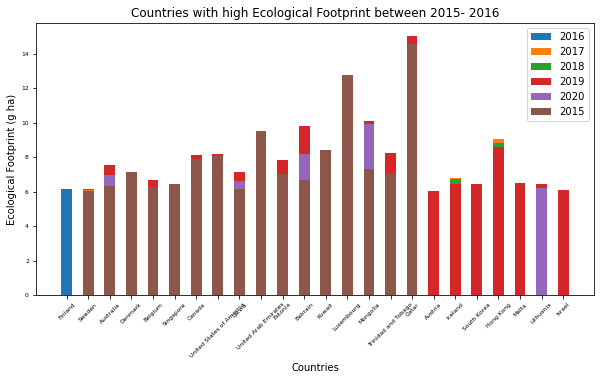

                      Country              Region Happiness Rank  \
0                 Switzerland      Western Europe              1   
1                     Iceland      Western Europe              2   
2                     Denmark      Western Europe              3   
3                      Norway      Western Europe              4   
4                      Canada       North America              5   
..                        ...                 ...            ...   
855                  Tanzania  Sub-Saharan Africa           None   
856  Central African Republic  Sub-Saharan Africa           None   
857                    Rwanda  Sub-Saharan Africa           None   
858                  Zimbabwe  Sub-Saharan Africa           None   
859               Afghanistan          South Asia           None   

     Ladder score  Standard error of ladder score  Log GDP per capita  \
0          7.5870                        0.034110            1.396510   
1          7.5610                    

In [7]:
#---Merging df1(containing data between year 2015-2020) with a conceptually related dataset of happy planet index---------

df2 = pd.read_excel('happy-planet-index-2015-2020-data-set.xlsx')
print(df2)

Top_5_HPI = df2.loc[(df2['Ecological Footprint (g ha)'] > 6)]

Year_Set = set(Top_5_HPI['Year'])
plt.figure(figsize=(10,5))
for year in Year_Set:
    selected_data = Top_5_HPI.loc[Top_5_HPI['Year']== year]
    plt.bar(selected_data['Country'],selected_data['Ecological Footprint (g ha)'], label= year,width=0.5)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=6)
plt.xlabel('Countries')
plt.ylabel('Ecological Footprint (g ha)')
plt.title('Countries with high Ecological Footprint between 2015- 2016')
plt.xticks(rotation = 45)
plt.show()

#in one of the dataframes the year is a string and the other it is an int64 so had to convert it first and then join
df1['Year']=df1['Year'].astype(int)
df = pd.merge(df1,df2, how= "inner", left_on = ['Country','Year'],right_on = ['Country','Year'])
print(df)#[860 rows x 33 columns]

#checking for null values
print(df.shape[0] - df.count())#count of None values displayed

#Checked for the missing value
print(df1[df1['Government Corruption'].isnull()])# The missing value for Government of Corruption is in the year 2018
print(df1['Government Corruption'].median())#0.089
print(df1['Government Corruption'].mean())#0.12568861080298596
#The missing value for United Arab Emirates .Probabily due to ruler cange in 2019
#2015 : 0.38583
#2016 : 0.35561
#2017 : 0.324489563703537
#2018 : value missing
#2019 : 0.182
#2020 : 0.220213518
#2021 : 0.223
#replaced the missing value for column Government Corruption with mean
df['Government Corruption'].fillna(df['Government Corruption'].mean, inplace=True)
print(df.shape[0] - df.count())
#Duplicate or extra columns which are not needed are removed
df.drop(['HPI rank','GDP per capita ($)','Ladder of life (Wellbeing) (0-10)','Life Expectancy (years)'],axis ='columns',inplace = True)
df

"""
Out of 860, 719 values are missing or not collected in the original dataset for the following columns.Hence dropping the same 
due to huge nuumber of missing value and as there are less chances to get any insight from these.Also we are using log GDP per
per capita and healthy life to life expectancy ratio for analysis instead of logged GDP per capita and 
Healthy life expectancy(in years).So those two columns are also removed
"""

df.drop(['Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Ladder score in Dystopia'],axis ='columns',inplace = True)

"""
Just like the above columns the following ones have huge count in missing values .Also these irrelevant with the research question
"""

df.drop(['Standard error of ladder score'],axis ='columns',inplace = True) 
"""
The following columns are filled with 0 as the data is missing in the merged dataset of world happiness index and happy planet index
"""
df['Happiness Rank'].fillna(0, inplace=True)# Happiness rank is removed for 2020 and 2021 year .however it can be measured w.r.t ladder score
df['Region'].fillna(0, inplace=True)
df['Family'].fillna(0, inplace=True)
df['Dystopia + residual'].fillna(0, inplace=True)
df['Explained by: Social support'].fillna(0, inplace=True)
df['upperwhisker'].fillna(0, inplace=True)
df['lowerwhisker'].fillna(0, inplace=True)
df['HPI'].fillna(0, inplace=True)

print(df.shape[0] - df.count())# Only 46 rows left for Ecological Footprint (g ha) as missing data which needs to be removed for accuracy in prediction

"""*********************************************************************************
The rest of the missing values in Ecological Footprint (g ha) is dropped as filling
the same with mean,median or 0 will give wrong prediction.
****************************************************************"""
df.dropna(axis = 0 ,inplace = True)

print(df.shape[0] - df.count())# No missing or null values!!!!


     Happiness Rank  Ladder score  Log GDP per capita  \
0                 1        7.5870            1.396510   
2                 3        7.5270            1.325480   
3                 4        7.5220            1.459000   
4                 5        7.4270            1.326290   
5                 6        7.4060            1.290250   
..              ...           ...                 ...   
845               0        4.1514            0.875229   
848               0        3.7594            0.536834   
851               0        3.5733            0.730576   
855               0        3.4762            0.457163   
858               0        3.2992            0.425564   

     Health (Life Expectancy)  Ecological Footprint (g ha)  \
0                    0.941430                     4.689626   
2                    0.874640                     7.145141   
3                    0.885210                     5.754590   
4                    0.905630                     7.921993   
5    

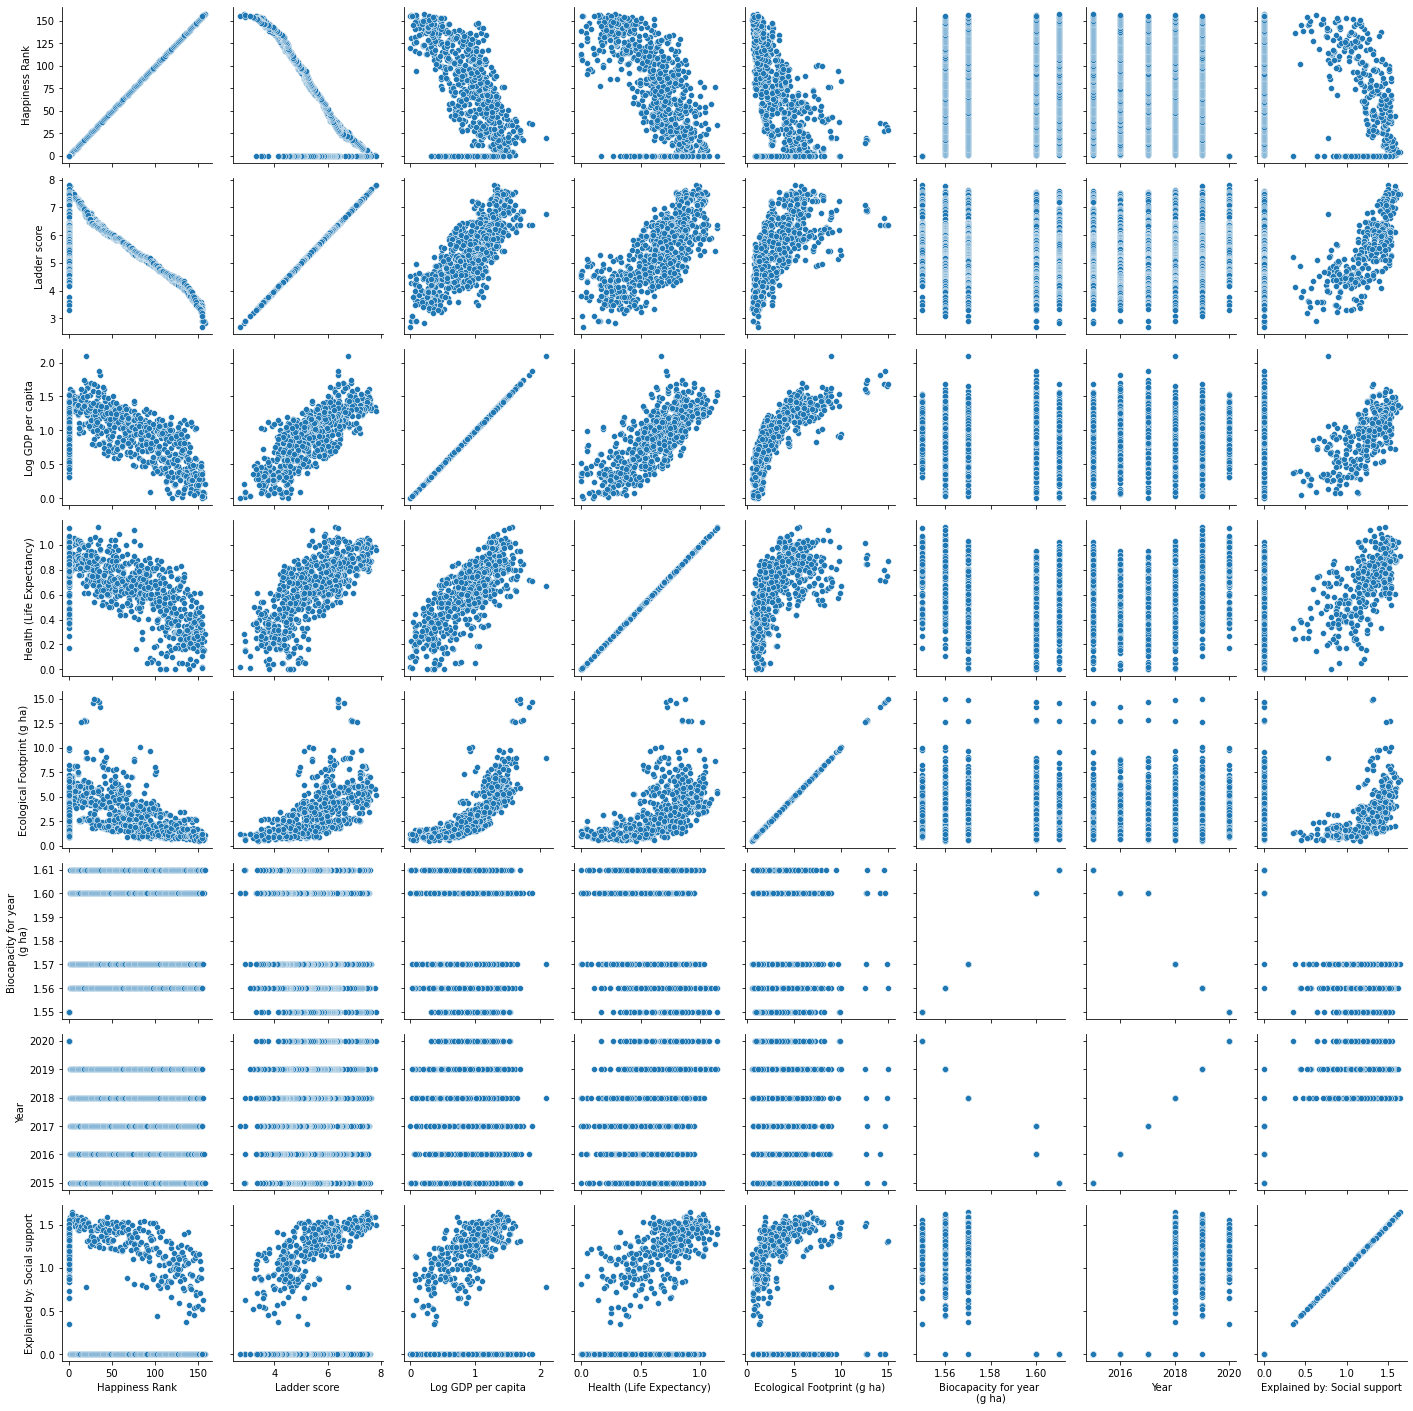

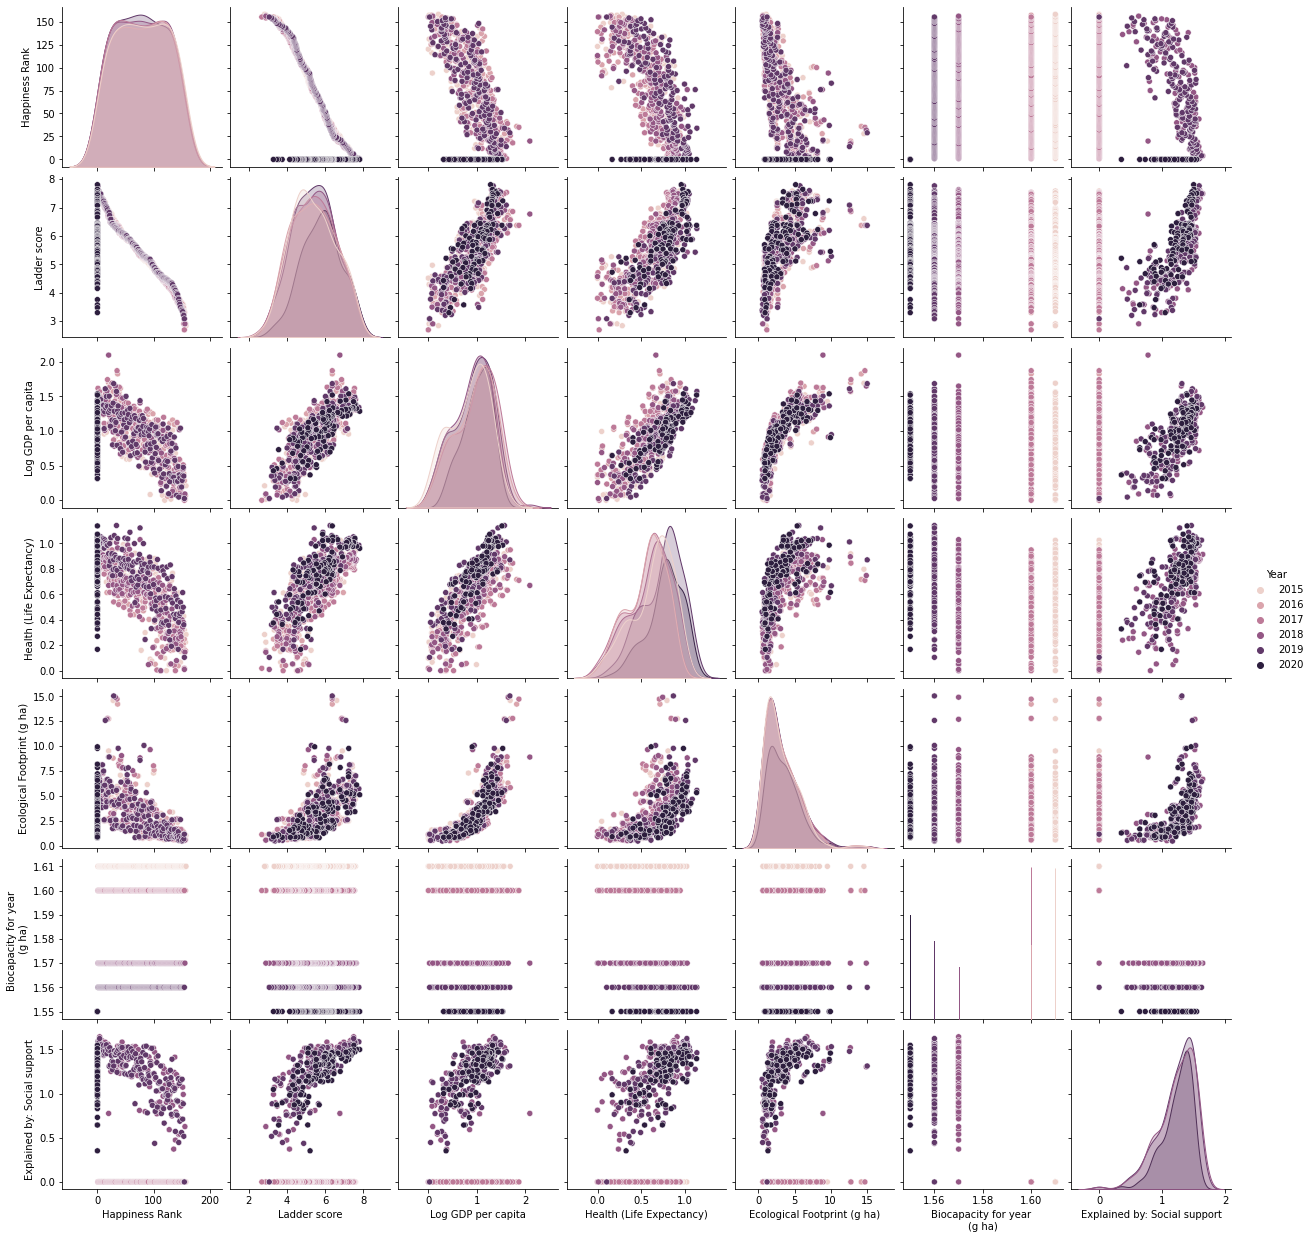

In [8]:

df
#As part of feature engineering the following column is dropped as it is also irrelevant to the research
df.drop(['Government Corruption','Population (thousands)','HPI'],axis ='columns',inplace = True)

selected_columns = df[['Happiness Rank','Ladder score','Log GDP per capita','Health (Life Expectancy)','Ecological Footprint (g ha)','Biocapacity for year \n(g ha)','Year','Explained by: Social support']]
#plot_df = pd.DataFrame(data)
new_df = selected_columns.copy()
print(new_df)
 
g = sns.PairGrid(new_df)
g.map(sns.scatterplot)
sns.pairplot(new_df, hue="Year", height=2.5)

Outlier Detection process

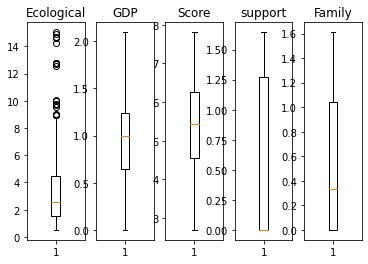

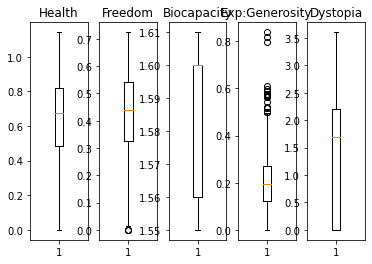

count    814.000000
mean       3.293909
std        2.363340
min        0.515749
25%        1.523914
50%        2.586699
75%        4.475795
max       15.037589
Name: Ecological Footprint (g ha), dtype: float64
count    814.000000
mean       0.424536
std        0.148540
min        0.000000
25%        0.324092
50%        0.438227
75%        0.540060
max        0.724000
Name: Freedom, dtype: float64
count    814.000000
mean       0.211508
std        0.121394
min        0.000000
25%        0.121832
50%        0.196335
75%        0.271469
max        0.838075
Name: Explained by: Generosity, dtype: float64
         Country                        Region  Happiness Rank  Ladder score  \
0    Switzerland                Western Europe               1        7.5870   
11    Costa Rica   Latin America and Caribbean              12        7.2260   
13        Mexico   Latin America and Caribbean              14        7.1870   
14        Brazil   Latin America and Caribbean              16        6.9

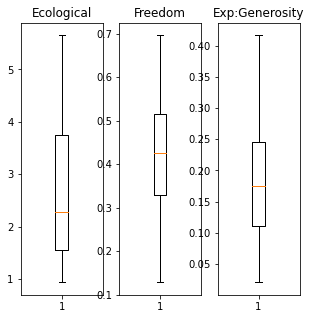

In [9]:
#-----------------------Outlier Detection--------------------------------------


# Plot boxplot to find outliers

#Country,Region,Happiness Rank ,Year,upperwhisker,lowerwhisker,ISO,Continent are ignored as its irrelevant to check outliers 
#for these
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
ax1.boxplot(df['Ecological Footprint (g ha)']) #Outliers visible
ax1.set_title('Ecological')
ax2.boxplot(df['Log GDP per capita'])
ax2.set_title('GDP')
ax3.boxplot(df['Ladder score'])
ax3.set_title('Score')
ax4.boxplot(df['Explained by: Social support']) # Outliers visible
ax4.set_title('support')
ax5.boxplot(df['Family'])
ax5.set_title('Family')
plt.show()


f, (ax6,ax7,ax8,ax9,ax10) = plt.subplots(1, 5)

ax6.boxplot(df['Health (Life Expectancy)'])
ax6.set_title('Health')
ax7.boxplot(df['Freedom'])# Outliers visible
ax7.set_title('Freedom')
ax8.boxplot(df['Biocapacity for year \n(g ha)'])
ax8.set_title('Biocapacity')
ax9.boxplot(df['Explained by: Generosity'])# Outliers visible
ax9.set_title('Exp:Generosity')
ax10.boxplot(df['Dystopia + residual'])
ax10.set_title('Dystopia')

plt.show()


print(df['Ecological Footprint (g ha)'].describe())
print(df['Freedom'].describe())
print(df['Explained by: Generosity'].describe())

# calculate the mean and standard deviations of the columns with outliers
meanEco = df['Ecological Footprint (g ha)'].mean()
stdDevEco = df['Ecological Footprint (g ha)'].std()
meanFrdm = df['Freedom'].mean()
stdDevFrdm = df['Freedom'].std()
meanGen = df['Explained by: Generosity'].mean()
stdDevGen = df['Explained by: Generosity'].std()

Eco_Upper_Limit = meanEco + stdDevEco
Eco_Lower_Limit = meanEco - stdDevEco
Frdm_Upper_Limit = meanFrdm + 2*stdDevFrdm
Frdm_Lower_Limit = meanFrdm - 2*stdDevFrdm
Gen_Upper_Limit = meanGen + 1.7*stdDevGen
Gen_Lower_Limit = meanGen - 1.7*stdDevGen

df3 = df[(df['Ecological Footprint (g ha)']<Eco_Upper_Limit)& (df['Ecological Footprint (g ha)']> Eco_Lower_Limit)] #[630 rows x 18 columns]
df4 = df3[(df3['Freedom']<Frdm_Upper_Limit)& (df3['Freedom']> Frdm_Lower_Limit)] #[611 rows x 18 columns]
df5 = df4[(df4['Explained by: Generosity']<Gen_Upper_Limit)& (df4['Explained by: Generosity']> Gen_Lower_Limit)] #[570 rows x 18 columns]
  
print(df5)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5, 5))
ax1.boxplot(df5['Ecological Footprint (g ha)'])
ax1.set_title('Ecological')
ax2.boxplot(df5['Freedom'])# Outliers visible
ax2.set_title('Freedom')
ax3.boxplot(df5['Explained by: Generosity'])# Outliers visible
ax3.set_title('Exp:Generosity')
plt.show()

Checking for data transformation

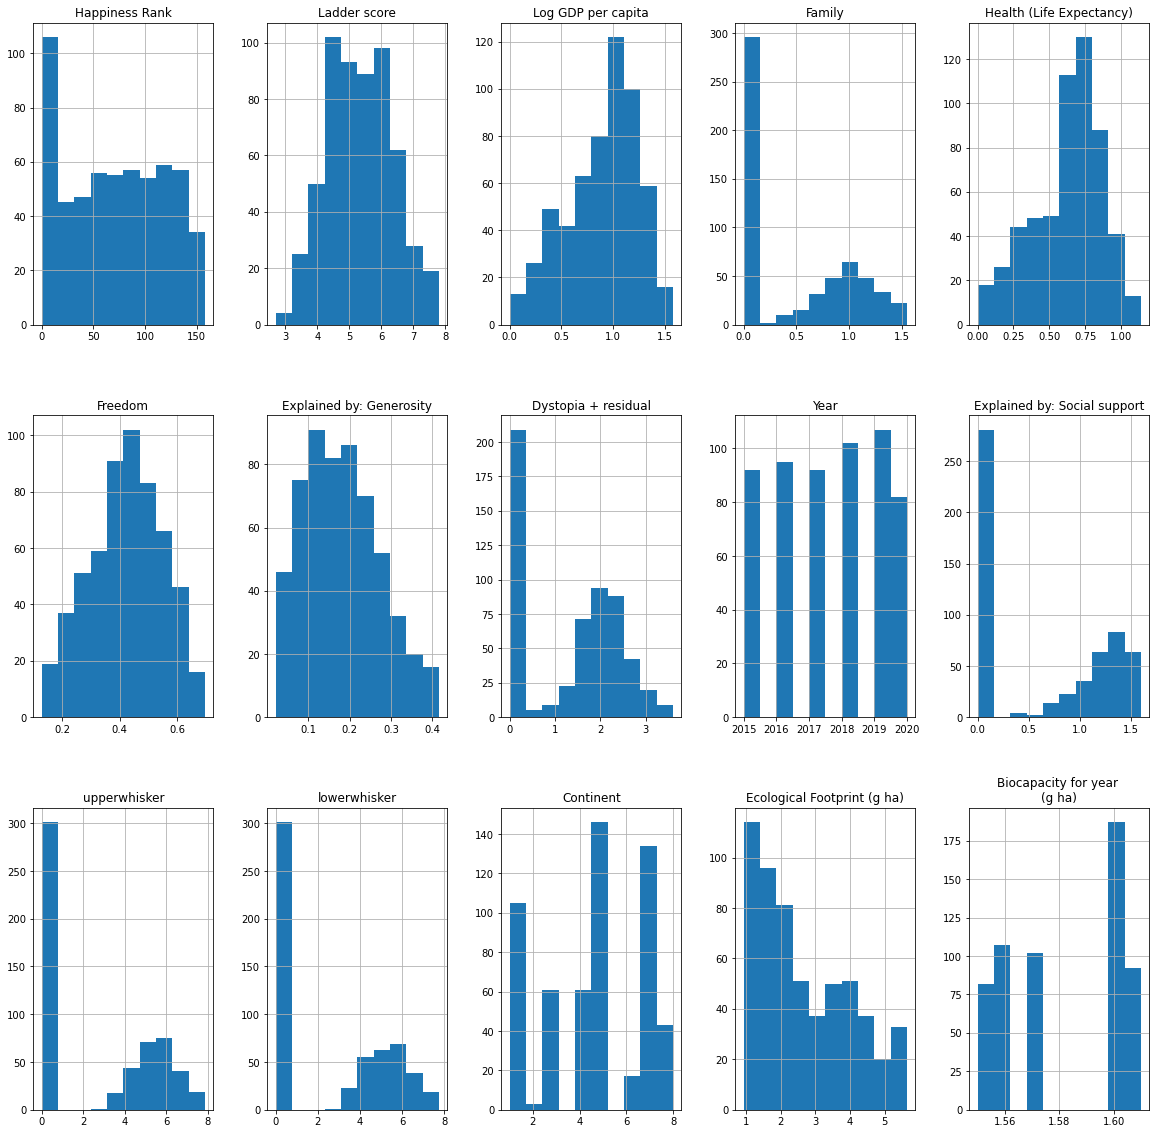

In [10]:
#------------------Data Transformation-------------------------------
#-----------Look at the distribution with histogram to check if transformation is required-----

# This will select all the numeric columns 
NumericDF=df5.select_dtypes(include='number')

# Get the number of columns
numCols=NumericDF.shape[1]

#
fig, axisRows = plt.subplots(numCols//7+1, 5, figsize=(20, 20))
i = 0
for axisCols in axisRows:
    for axis in axisCols:
        if (i<numCols):
            NumericDF.hist(column = NumericDF.columns[i], bins = 10, ax=axis)
            i = i+1

         Country                        Region  Happiness Rank  Ladder score  \
0    Switzerland                Western Europe               1        7.5870   
11    Costa Rica   Latin America and Caribbean              12        7.2260   
13        Mexico   Latin America and Caribbean              14        7.1870   
14        Brazil   Latin America and Caribbean              16        6.9830   
20     Venezuela   Latin America and Caribbean              23        6.8100   
..           ...                           ...             ...           ...   
838    Sri Lanka                    South Asia               0        4.3270   
845        Egypt  Middle East and North Africa               0        4.1514   
851        India                    South Asia               0        3.5733   
855     Tanzania            Sub-Saharan Africa               0        3.4762   
858     Zimbabwe            Sub-Saharan Africa               0        3.2992   

     Log GDP per capita   Family  Healt

C:\Users\raazr\AppData\Local\Temp/ipykernel_9128/1722865916.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Ecological Footprint (g ha)'] = df5['Ecological Footprint (g ha)'].apply(np.log)


,Country,Region,Happiness Rank,Ladder score,Log GDP per capita,Family,Health (Life Expectancy),Freedom,Explained by: Generosity,Dystopia + residual,Year,Explained by: Social support,upperwhisker,lowerwhisker,ISO,Continent,Ecological Footprint (g ha),Biocapacity for year \n(g ha)
0,Switzerland,Western Europe,1,7.5870,1.396510,1.34951,0.941430,0.665570,0.296780,2.517380,2015,0.000000,0.000000,0.000000,CHE,3,1.545353,1.61
11,Costa Rica,Latin America and Caribbean,12,7.2260,0.955780,1.23788,0.860270,0.633760,0.254970,3.177280,2015,0.000000,0.000000,0.000000,CRI,1,0.923903,1.61
13,Mexico,Latin America and Caribbean,14,7.1870,1.020540,0.91451,0.814440,0.481810,0.140740,3.602140,2015,0.000000,0.000000,0.000000,MEX,1,0.928966,1.61
14,Brazil,Latin America and Caribbean,16,6.9830,0.981240,1.23287,0.697020,0.490490,0.145740,3.260010,2015,0.000000,0.000000,0.000000,BRA,1,1.022945,1.61
20,Venezuela,Latin America and Caribbean,23,6.8100,1.044240,1.25596,0.720520,0.429080,0.058410,3.191310,2015,0.000000,0.000000,0.000000,VEN,1,1.043162,1.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,Sri Lanka,South Asia,0,4.3270,0.897987,0.00000,0.792037,0.528632,0.252666,0.611289,2020,1.194940,4.431048,4.222952,LKA,6,0.325655,1.55
845,Egypt,Middle East and North Africa,0,4.1514,0.875229,0.00000,0.596911,0.373685,0.068801,1.158818,2020,0.982540,4.221920,4.080881,EGY,4,0.457672,1.55
851,India,South Asia,0,3.5733,0.730576,0.00000,0.540570,0.581142,0.237072,0.734131,2020,0.644199,3.627596,3.519003,IND,6,0.131679,1.55
855,Tanzania,Sub-Saharan Africa,0,3.4762,0.457163,0.00000,0.442678,0.509343,0.271541,0.718963,2020,0.872675,3.600091,3.352309,TZA,5,0.057326,1.55


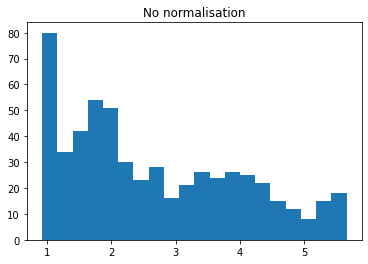

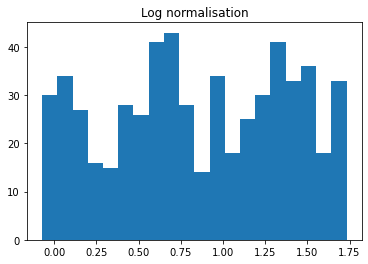

In [11]:

#----------------normalised Ecological Footprint--------------------


# before normalisation
f, ax1 = plt.subplots(1, 1)
ax1.hist(df5['Ecological Footprint (g ha)'], 20)
ax1.set_title('No normalisation')
print(df5)

# normalize 'Ecological Footprint (g ha)' using the apply function
df5['Ecological Footprint (g ha)'] = df5['Ecological Footprint (g ha)'].apply(np.log)

# before / after normalisation
f, ax2 = plt.subplots(1, 1, sharey = True)

ax2.hist(df5['Ecological Footprint (g ha)'], 20)
ax2.set_title('Log normalisation')

print(df5.shape[0] - df5.count())

df5

Checking for Correlation

'\nCould observe that Ecological footprint is highly correlated to Log GDP per capita ,\nLadder score and Health(Life Expectancy) and less correlated to Biocapacity for year\nwhich prove my initial hypothesis was wrong.Hence proceeding my analysis against healthy \nlife expectancy and GDP per capita\n'

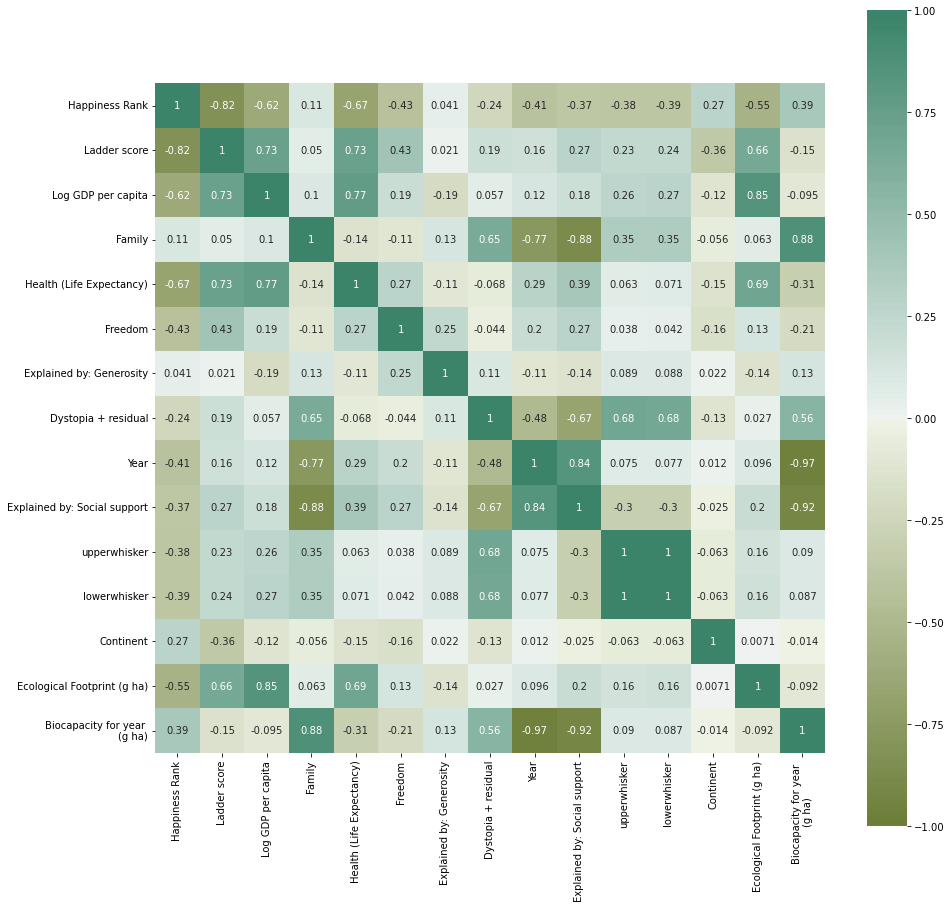

In [12]:
#------------Correlation analysis----------------
import seaborn as sns

corr = df5.corr()
# plot the heatmap and annotation on it
plt.figure(figsize = (15,15))
import seaborn as sns
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(100, 515, n=200),
    annot=True,
    square=True
)
"""
Could observe that Ecological footprint is highly correlated to Log GDP per capita ,
Ladder score and Health(Life Expectancy) and less correlated to Biocapacity for year
which prove my initial hypothesis was wrong.Hence proceeding my analysis against healthy 
life expectancy and GDP per capita
"""

Pearson's correlation for ecological footprint against ladderscore is 0.6612652548907889 with a p-value of 6.138505997620755e-73
Pearson's correlation for ecological footprint against Biocapacity for year 
(g ha) is -0.09219557589288654 with a p-value of 0.027736254924329264
Pearson's correlation for 'Log GDP per capita' against ladderscore is 0.7333118938884975 with a p-value of 3.052509193411884e-97
Pearson's correlation for Health (Life Expectancy) against ladderscore is 0.7283186592132903 with a p-value of 2.628648539673471e-95
Pearson's correlation for ecological footprint against Log GDP per capita is 0.854284882830217 with a p-value of 1.5492217208737244e-163
Pearson's correlation for ecological footprint against Health (Life Expectancy) is 0.6930312082493724 with a p-value of 9.090983995379572e-83
     Happiness Rank  Ladder score  Explained by: Social support  \
0                 1        7.5870                      0.000000   
11               12        7.2260                

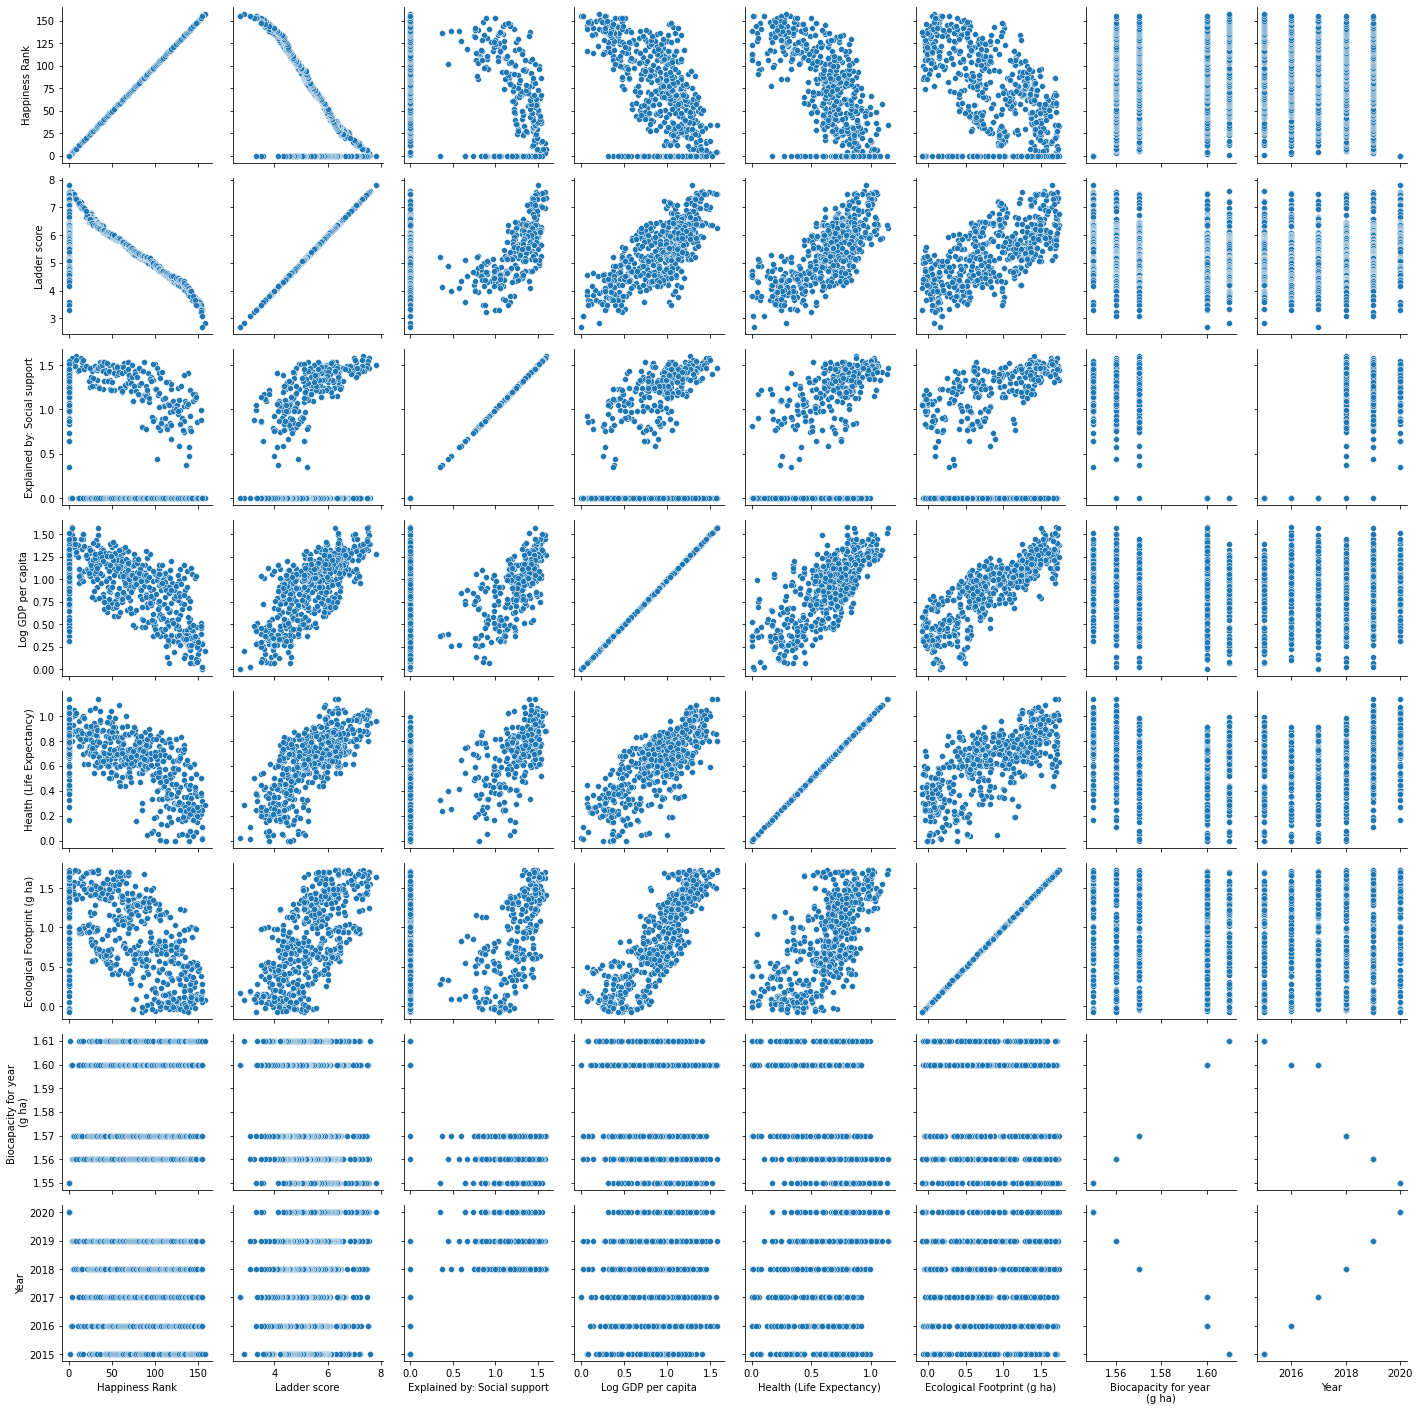

In [13]:
# From correlation matrix we could see that ecological footprint is highly corelated to Ladder score and Log GDP per capita and 
# health (life expectancy)
#Pearson's correlation is calculated to check the linear relationship between these features
import scipy.stats as stats

corrPearson, pValPearson = stats.pearsonr(df5['Ladder score'],df5['Ecological Footprint (g ha)'])
print ("Pearson's correlation for ecological footprint against ladderscore is", corrPearson, "with a p-value of",pValPearson)

corrPearson, pValPearson = stats.pearsonr(df5['Biocapacity for year \n(g ha)'],df5['Ecological Footprint (g ha)'])
print ("Pearson's correlation for ecological footprint against Biocapacity for year \n(g ha) is", corrPearson, "with a p-value of",pValPearson)


corrPearson, pValPearson = stats.pearsonr(df5['Ladder score'],df5['Log GDP per capita'])
print ("Pearson's correlation for 'Log GDP per capita' against ladderscore is", corrPearson, "with a p-value of",pValPearson)

corrPearson, pValPearson = stats.pearsonr(df5['Ladder score'],df5['Health (Life Expectancy)'])
print ("Pearson's correlation for Health (Life Expectancy) against ladderscore is", corrPearson, "with a p-value of",pValPearson)

corrPearson, pValPearson = stats.pearsonr(df5['Log GDP per capita'],df5['Ecological Footprint (g ha)'])
print ("Pearson's correlation for ecological footprint against Log GDP per capita is", corrPearson, "with a p-value of",pValPearson)

corrPearson, pValPearson = stats.pearsonr(df5['Health (Life Expectancy)'],df5['Ecological Footprint (g ha)'])
print ("Pearson's correlation for ecological footprint against Health (Life Expectancy) is", corrPearson, "with a p-value of",pValPearson)

selected_columns = df5[['Happiness Rank','Ladder score','Explained by: Social support','Log GDP per capita','Health (Life Expectancy)','Ecological Footprint (g ha)','Biocapacity for year \n(g ha)','Year']]
#plot_df = pd.DataFrame(data)
new_df = selected_columns.copy()
print(new_df)
 
g = sns.PairGrid(new_df)
g.map(sns.scatterplot)
#which clearly shows there is no corelation between Ecological footprint and Biocapacity for year'
#Also the correlation matrix clearly shows there no much correlation between Biocapacity for year and ladder score


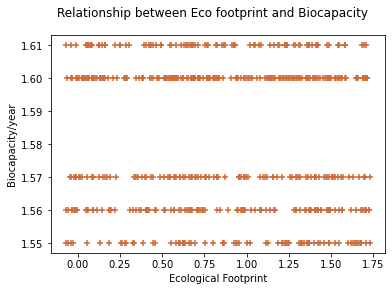

Index(['Country', 'Ladder score', 'Health (Life Expectancy)',
       'Ecological Footprint (g ha)'],
      dtype='object')
The Number of features got reduced to: 
(570, 4)


C:\Users\raazr\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
#----------------------Feature Seclection ------------------------------
"""
**************************************************************************
The correlation matrix clearly signifies that certains features are irrelevant which can be dropped
***************************************************************************
"""
import matplotlib.pyplot as plt

x= df5['Ecological Footprint (g ha)']
y=df5['Biocapacity for year \n(g ha)']


plt.xlabel('Ecological Footprint')
plt.ylabel('Biocapacity/year')
plt.scatter(x, y, c = "#D06B36ff", marker = '+')
plt.suptitle('Relationship between Eco footprint and Biocapacity')
plt.show()

#which clearly shows there is negligible corelation between Ecological footprint and Biocapacity for year'
#Also the correlation matrix clearly shows Ecological footprint is highly correlated to  ladder score,Log GDP per capita ,Health (Life Expectancy)
#Log GDP per capita  and Health (Life Expectancy) are highly correlated to ladder score .Dropping Log GDP per capita 
#as its highly correlated to ecological footprints when compared to Health (Life Expectancy).

df5.drop(['Year','Log GDP per capita','Happiness Rank','Region','Continent','ISO','Biocapacity for year \n(g ha)','Explained by: Social support','Explained by: Generosity','Family','Dystopia + residual','upperwhisker','lowerwhisker','Freedom'],axis ='columns',inplace = True)

print(df5.columns)
"""
 Index(['Country','Ladder score',
        'Log GDP per capita','Health (Life Expectancy)', 'Year',
       'Ecological Footprint (g ha)'],
      dtype='object')
"""
print("The Number of features got reduced to: ")
print(df5.shape) #(570, 6)

One Hot Encoding done on Countries

In [15]:
#-------------------------One Hot encoding-----------------------------------
#Here Country column needs to be converted to numeric hence one hot encoding is appplied
dummies = pd.get_dummies(df5.Country)
print(dummies.head())

# To avoid dummy variable trap just dropping the last column
df6 = pd.concat([df5,dummies.drop('Zimbabwe',axis = 'columns')],axis='columns')
print(df6.head())

df7 = df6.drop('Country',axis= 'columns')
print(df7.head())
print(df7.shape) #(570, 121)
df7

    Albania  Algeria  Argentina  Armenia  Austria  Azerbaijan  Belarus  \
0         0        0          0        0        0           0        0   
11        0        0          0        0        0           0        0   
13        0        0          0        0        0           0        0   
14        0        0          0        0        0           0        0   
20        0        0          0        0        0           0        0   

    Belgium  Benin  Bhutan  ...  Turkmenistan  Uganda  Ukraine  \
0         0      0       0  ...             0       0        0   
11        0      0       0  ...             0       0        0   
13        0      0       0  ...             0       0        0   
14        0      0       0  ...             0       0        0   
20        0      0       0  ...             0       0        0   

    United Kingdom  Uruguay  Uzbekistan  Venezuela  Vietnam  Zambia  Zimbabwe  
0                0        0           0          0        0       0         0 

,Ladder score,Health (Life Expectancy),Ecological Footprint (g ha),Albania,Algeria,Argentina,Armenia,Austria,Azerbaijan,Belarus,...,Turkey,Turkmenistan,Uganda,Ukraine,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia
0,7.5870,0.941430,1.545353,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,7.2260,0.860270,0.923903,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,7.1870,0.814440,0.928966,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,6.9830,0.697020,1.022945,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,6.8100,0.720520,1.043162,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,4.3270,0.792037,0.325655,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,4.1514,0.596911,0.457672,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
851,3.5733,0.540570,0.131679,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
855,3.4762,0.442678,0.057326,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Model preparation and evaluation between multilinear regression and Decision tree.
Used TransformTargetRegressor to scale and transform target variables for regression.

In [16]:
df7

X = df7.drop('Ladder score',axis='columns') #predictor variables
X.head()
y = df7['Ladder score'] # response variable
print(df7)

#Test train split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size= 0.2,random_state= 0)

from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor # transforming target variable for regression 
from sklearn.preprocessing import MinMaxScaler

lr = LinearRegression() 
lr_tran = TransformedTargetRegressor(
        regressor=lr,  transformer=MinMaxScaler()
        )
lr_tran.fit(X_train,y_train)

sc= lr_tran.score(X_test, y_test)


print('linear regression accuracy',sc) #0.8912550545926602

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

sc1= dt.score(X_test, y_test)
print('decision tree accuracy',sc1) #0.6869987242059261

print(df7.describe().round().T)


     Ladder score  Health (Life Expectancy)  Ecological Footprint (g ha)  \
0          7.5870                  0.941430                     1.545353   
11         7.2260                  0.860270                     0.923903   
13         7.1870                  0.814440                     0.928966   
14         6.9830                  0.697020                     1.022945   
20         6.8100                  0.720520                     1.043162   
..            ...                       ...                          ...   
838        4.3270                  0.792037                     0.325655   
845        4.1514                  0.596911                     0.457672   
851        3.5733                  0.540570                     0.131679   
855        3.4762                  0.442678                     0.057326   
858        3.2992                  0.375038                    -0.071073   

     Albania  Algeria  Argentina  Armenia  Austria  Azerbaijan  Belarus  ...  \
0      

Prediction using Multilinear regression

In [17]:
#linear regression has good score.Hence its chosen to do a predictive model
#----------------Prediction using Multilinear regression------------------------

def predict_ladderscore_linearregression(Country,Ecology,Health):  #,GDP
    Happy_index = np.where(X.columns== Country)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = Ecology
    x[1] = Health
    #x[2] = GDP
    #x[3] = Year
    if Happy_index>=0:
        x[Happy_index]==1
    return lr_tran.predict([x])[0]       
print(predict_ladderscore_linearregression('Finland',5.15298793786271 ,0.961271405) )   #,1.285189509
# Value 7.181973347960354 is retured which was 7.808700085 as per data.But the result was close enough


7.181973347960354


code reference: https://github.com/codebasics/py/blob/master/DataScience/BangloreHomePrices/model/banglore_home_prices_final.ipynb